<a href="https://colab.research.google.com/github/Iamakhilvg/Iamakhilvg-Financial-Analysis.NLP/blob/main/NLP_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Data SET/Financial Analysis.csv')
df


,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [2]:
df['Sentiment'].value_counts()

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

In [3]:
df['Sentiment']=df['Sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [4]:
sent=df['Sentence']
sent

0       The GeoSolutions technology will leverage Bene...
1       $ESI on lows, down $1.50 to $2.50 BK a real po...
2       For the last quarter of 2010 , Componenta 's n...
3       According to the Finnish-Russian Chamber of Co...
4       The Swedish buyout firm has sold its remaining...
                              ...                        
5837    RISING costs have forced packaging producer Hu...
5838    Nordic Walking was first used as a summer trai...
5839    According shipping company Viking Line , the E...
5840    In the building and home improvement trade , s...
5841    HELSINKI AFX - KCI Konecranes said it has won ...
Name: Sentence, Length: 5842, dtype: object

In [5]:
#REMOVAL OF SPECIAL CHARACTERS
sent=sent.str.replace('[^A-Za-z0-9]+',' ')
sent

0       The GeoSolutions technology will leverage Bene...
1        ESI on lows down 1 50 to 2 50 BK a real possi...
2       For the last quarter of 2010 Componenta s net ...
3       According to the Finnish Russian Chamber of Co...
4       The Swedish buyout firm has sold its remaining...
                              ...                        
5837    RISING costs have forced packaging producer Hu...
5838    Nordic Walking was first used as a summer trai...
5839    According shipping company Viking Line the EU ...
5840    In the building and home improvement trade sal...
5841    HELSINKI AFX KCI Konecranes said it has won an...
Name: Sentence, Length: 5842, dtype: object

In [6]:
#STEMMING&TOKENIZING
from nltk.stem import SnowballStemmer
from nltk import TweetTokenizer
st=SnowballStemmer('english')
tk=TweetTokenizer()

In [7]:
sent=sent.apply(lambda x:[st.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))

In [8]:
#REMOVAL OF STOPWORDS IN THE DATASET
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
sw=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
sent=sent.apply(lambda x:[i for i in tk.tokenize(x) if i not in sw]).apply(lambda x:' '.join(x))

In [10]:
#VECTORIZATION
from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer()
train_vec=vect.fit_transform(sent)
print(train_vec)

  (0, 5246)	0.1833008779067519
  (0, 2229)	0.19205925557131567
  (0, 6150)	0.18064001805112886
  (0, 5456)	0.12731516226281425
  (0, 2333)	0.20166699101828808
  (0, 5347)	0.2589282397996139
  (0, 6536)	0.24625898667946033
  (0, 6054)	0.21978412892537136
  (0, 2240)	0.23358973355930687
  (0, 6975)	0.24144236018726342
  (0, 1518)	0.14526741206780652
  (0, 4846)	0.3739623057703337
  (0, 6275)	0.1480610302305703
  (0, 7276)	0.1480610302305703
  (0, 3671)	0.24625898667946033
  (0, 1592)	0.23029761540895097
  (0, 4760)	0.2589282397996139
  (0, 7738)	0.3063576549345305
  (0, 3588)	0.26791721794135237
  (1, 6134)	0.3540565551878513
  (1, 6444)	0.2844399786948538
  (1, 1662)	0.4358707948826524
  (1, 598)	0.5529618799525551
  (1, 4888)	0.2993520345466769
  (1, 3091)	0.45648222654233644
  :	:
  (5840, 2573)	0.28338077604197376
  (5840, 4082)	0.33130752806431885
  (5840, 7958)	0.31730884477923543
  (5840, 5239)	0.22242885313460403
  (5840, 1847)	0.3018407208054276
  (5840, 307)	0.3459225783657465


In [11]:
X=train_vec
y=df['Sentiment'].values

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=1)

In [13]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
scv=SVC()
nb=MultinomialNB()
rclf=RandomForestClassifier()
aclf=AdaBoostClassifier()


0.6588705077010839
              precision    recall  f1-score   support

          -1       0.18      0.07      0.10       251
           0       0.65      0.89      0.75       926
           1       0.82      0.55      0.65       576

    accuracy                           0.66      1753
   macro avg       0.55      0.50      0.50      1753
weighted avg       0.64      0.66      0.63      1753



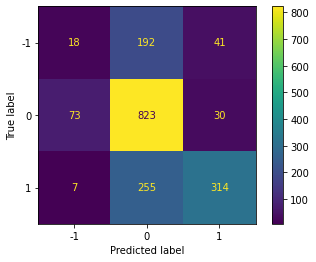

In [14]:
#SUPPORT VECTOR CLASSIFIER
scv.fit(X_train,y_train)
y_pred=scv.predict(X_test)
y_pred
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report
print(accuracy_score(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6486023958927553
              precision    recall  f1-score   support

          -1       1.00      0.02      0.05       251
           0       0.63      0.97      0.76       926
           1       0.75      0.40      0.52       576

    accuracy                           0.65      1753
   macro avg       0.79      0.47      0.44      1753
weighted avg       0.72      0.65      0.58      1753



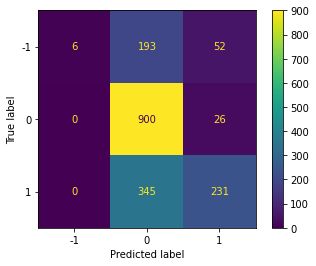

In [15]:
#MultinomialNB
nb.fit(X_train,y_train)
y_pred=nb.predict(X_test)
y_pred
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report
print(accuracy_score(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6514546491728466
              precision    recall  f1-score   support

          -1       0.18      0.11      0.14       251
           0       0.66      0.83      0.73       926
           1       0.78      0.61      0.68       576

    accuracy                           0.65      1753
   macro avg       0.54      0.51      0.52      1753
weighted avg       0.63      0.65      0.63      1753



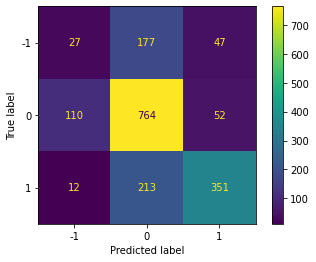

In [16]:
#RandomForestClassifier
rclf.fit(X_train,y_train)
y_pred=rclf.predict(X_test)
y_pred
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report
print(accuracy_score(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6360524814603536
              precision    recall  f1-score   support

          -1       0.38      0.20      0.26       251
           0       0.64      0.89      0.74       926
           1       0.74      0.42      0.54       576

    accuracy                           0.64      1753
   macro avg       0.58      0.50      0.51      1753
weighted avg       0.63      0.64      0.61      1753



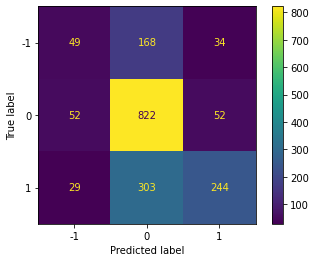

In [17]:
#AdaBoostClassifier
aclf.fit(X_train,y_train)
y_pred=aclf.predict(X_test)
y_pred
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report
print(accuracy_score(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print(classification_report(y_test,y_pred))